In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import numpy as np

from sklearn.preprocessing import StandardScaler

In [54]:
data = pd.read_csv("data/PA6_cleaned_dataset.csv")
data['Date'] = pd.to_datetime(data['time'])
data.drop('time', axis=1, inplace=True)

price_odace = pd.read_csv("data/price_odace.csv", sep=";", na_values=["#DIV/0!", "#NA"], decimal=",")
price_odace['Date'] = pd.to_datetime(price_odace['Date'])
price_GV2 = pd.read_csv("data/price_GV2.csv", sep=";", na_values=["#DIV/0!", "#NA"], decimal=",")
price_GV2['Date'] = pd.to_datetime(price_GV2['Date'])
price_IC60 = pd.read_csv("data/price_IC60.csv", sep=";", na_values=["#DIV/0!", "#NA"], decimal=",")
price_IC60['Date'] = pd.to_datetime(price_IC60['Date'])

price_odace = price_odace.loc[:'2023-01-01']
price_GV2 = price_GV2.loc[:'2023-01-01']
price_IC60 = price_IC60.loc[:'2023-01-01']

/tmp/ipykernel_313/2147210933.py:6: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/tmp/ipykernel_313/2147210933.py:8: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/tmp/ipykernel_313/2147210933.py:10: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [55]:
price_odace

,Date,Mean_price_Schneider,Mean_price_Legrand,Mean_price_Hager
0,2021-10-17,1.814706,0.0,0.0
1,2021-10-18,1.651714,0.0,0.0
2,2021-10-19,2.109318,0.0,0.0
3,2021-10-20,1.963333,0.0,0.0
4,2021-10-21,2.185962,0.0,0.0
...,...,...,...,...
198,2022-07-02,0.000000,0.0,0.0
199,2022-07-03,3.592414,0.0,0.0
200,2022-07-04,2.053000,0.0,0.0
201,2022-07-05,3.520000,0.0,0.0


In [56]:
price_GV2.drop(['Mean_price_Eaton ', 'Mean_price_Legrand '], axis=1, inplace=True)

In [57]:
price_odace = price_odace.replace(0, np.nan)
price_GV2 = price_GV2.replace(0, np.nan)
price_IC60 = price_IC60.replace(0, np.nan)

price_odace = price_odace.fillna(method='ffill')
price_GV2 = price_GV2.fillna(method='ffill')
price_IC60 = price_IC60.fillna(method='ffill')

/tmp/ipykernel_313/3929967991.py:5: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/3929967991.py:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/3929967991.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [58]:
price_odace_best = price_odace.merge(data[['Date', 'best_price_compound']], on='Date', how='left')

# Merge 'best_price_compound' from 'data' into 'price_GV2'
price_GV2_best = price_GV2.merge(data[['Date', 'best_price_compound']], on='Date', how='left')

# Merge 'best_price_compound' from 'data' into 'price_IC60'
price_IC60_best = price_IC60.merge(data[['Date', 'best_price_compound']], on='Date', how='left')

In [59]:
price_odace_best.sort_values(by='Date', inplace=True)
price_odace_best.fillna(method='ffill', inplace=True) 
price_odace_best.fillna(method='bfill', inplace=True) 
# For price_GV2
price_GV2_best.sort_values(by='Date', inplace=True)
price_GV2_best.fillna(method='ffill', inplace=True)
price_GV2_best.fillna(method='bfill', inplace=True)

# For price_IC60
price_IC60_best.sort_values(by='Date', inplace=True)
price_IC60_best.fillna(method='ffill', inplace=True)
price_IC60_best.fillna(method='bfill', inplace=True)

/tmp/ipykernel_313/737635847.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/737635847.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/737635847.py:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/737635847.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/737635847.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/737635847.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

In [60]:
price_odace_best.set_index('Date', inplace=True)
price_GV2_best.set_index('Date', inplace=True)
price_IC60_best.set_index('Date', inplace=True)

In [61]:
price_odace_best

,Mean_price_Schneider,Mean_price_Legrand,Mean_price_Hager,best_price_compound
Date,,,,
2021-10-17,1.814706,NaN,NaN,4030.148114
2021-10-18,1.651714,NaN,NaN,4030.148114
2021-10-19,2.109318,NaN,NaN,4030.148114
2021-10-20,1.963333,NaN,NaN,4030.148114
2021-10-21,2.185962,NaN,NaN,4030.148114
...,...,...,...,...
2022-07-02,3.065000,NaN,NaN,4005.070198
2022-07-03,3.592414,NaN,NaN,4005.070198
2022-07-04,2.053000,NaN,NaN,4005.070198


/mnt/c/Users/marqu/Desktop/github/SE_project/SE_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning:

invalid value encountered in divide

/mnt/c/Users/marqu/Desktop/github/SE_project/SE_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning:

invalid value encountered in divide

/mnt/c/Users/marqu/Desktop/github/SE_project/SE_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning:

invalid value encountered in divide



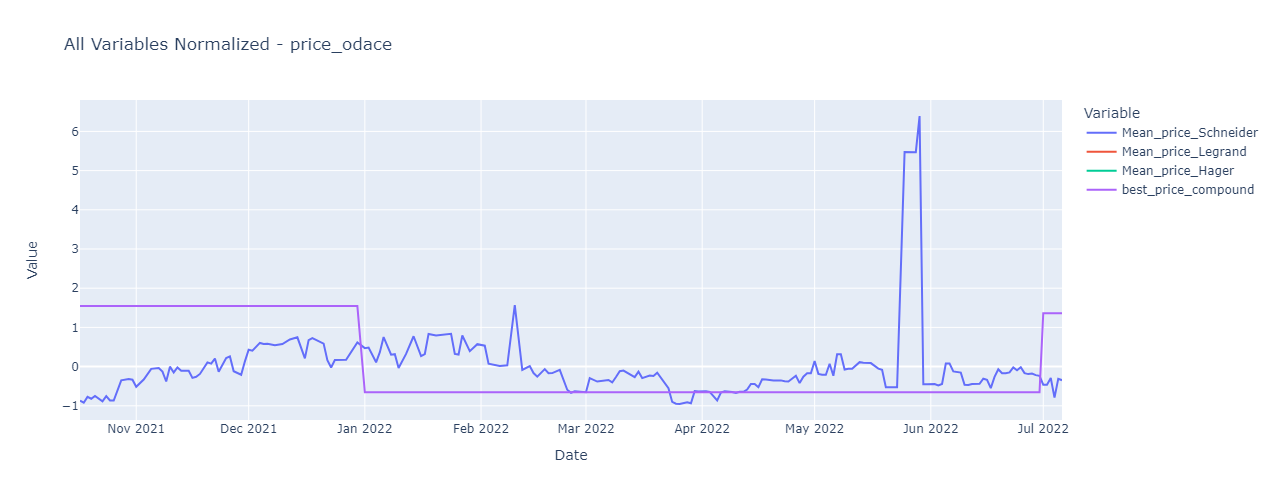

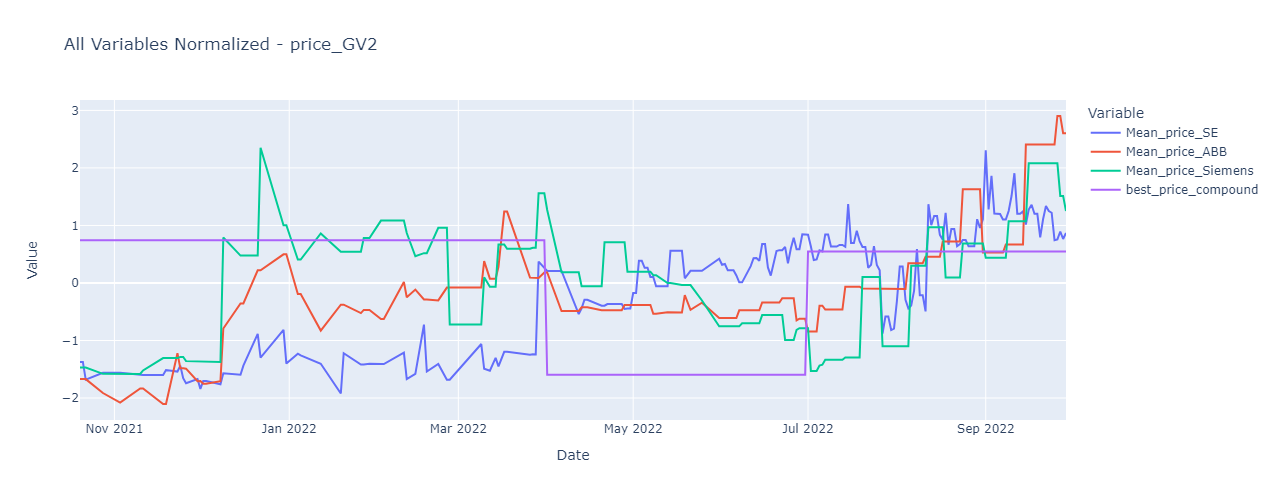

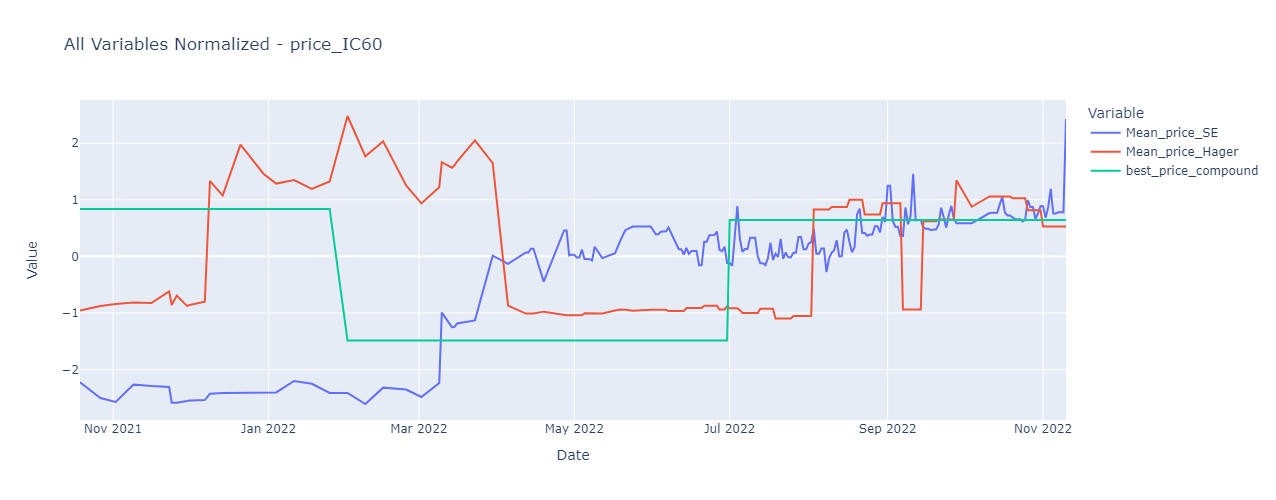

In [62]:
import plotly.express as px

# Normalizing Function
def normalize_and_plot(df, title):
    scaler = StandardScaler()

    # Normalize the DataFrame
    df_normalized = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

    # Melt the DataFrame for Plotly
    df_melted = df_normalized.reset_index().melt(id_vars=df_normalized.index.name, var_name='Variable', value_name='Value')

    # Plotting with Plotly
    fig = px.line(df_melted, x=df_normalized.index.name, y='Value', color='Variable', title=title)
    fig.update_layout(width=1300, height=500)
    fig.show()

# Apply to your DataFrames
normalize_and_plot(price_odace_best, 'All Variables Normalized - price_odace')
normalize_and_plot(price_GV2_best, 'All Variables Normalized - price_GV2')
normalize_and_plot(price_IC60_best, 'All Variables Normalized - price_IC60')

In [63]:
correlation_odace = price_odace_best.corr()['best_price_compound']
correlation_GV2 = price_GV2_best.corr()['best_price_compound']
correlation_IC60 = price_IC60_best.corr()['best_price_compound']

print("Correlation Coefficients for price_odace_best:")
print(price_odace_best.corr()['best_price_compound'])
print()  # Adding a blank line for better readability

# Printing correlation coefficients for price_GV2_best
print("Correlation Coefficients for price_GV2_best:")
print(price_GV2_best.corr()['best_price_compound'])
print()  # Adding a blank line for better readability

# Printing correlation coefficients for price_IC60_best
print("Correlation Coefficients for price_IC60_best:")
print(price_IC60_best.corr()['best_price_compound'])

Correlation Coefficients for price_odace_best:
Mean_price_Schneider   -0.055981
Mean_price_Legrand           NaN
Mean_price_Hager             NaN
best_price_compound     1.000000
Name: best_price_compound, dtype: float64

Correlation Coefficients for price_GV2_best:
Mean_price_SE         -0.190140
Mean_price_ABB         0.228828
Mean_price_Siemens     0.160504
best_price_compound    1.000000
Name: best_price_compound, dtype: float64

Correlation Coefficients for price_IC60_best:
Mean_price_SE          0.084080
Mean_price_Hager       0.306401
best_price_compound    1.000000
Name: best_price_compound, dtype: float64


In [64]:

price_odace_PA6 = price_odace.merge(data[['Date', 'PA6 GLOBAL_ EMEAS _ EUR per TON']], on='Date', how='left')

# Merge 'best_price_compound' from 'data' into 'price_GV2'
price_GV2_PA6 = price_GV2.merge(data[['Date', 'PA6 GLOBAL_ EMEAS _ EUR per TON']], on='Date', how='left')

# Merge 'best_price_compound' from 'data' into 'price_IC60'
price_IC60_PA6 = price_IC60.merge(data[['Date', 'PA6 GLOBAL_ EMEAS _ EUR per TON']], on='Date', how='left')

In [65]:
price_odace_PA6.sort_values(by='Date', inplace=True)
price_odace_PA6.fillna(method='ffill', inplace=True) 
price_odace_PA6.fillna(method='bfill', inplace=True) 
# For price_GV2
price_GV2_PA6.sort_values(by='Date', inplace=True)
price_GV2_PA6.fillna(method='ffill', inplace=True)
price_GV2_PA6.fillna(method='bfill', inplace=True)

# For price_IC60
price_IC60_PA6.sort_values(by='Date', inplace=True)
price_IC60_PA6.fillna(method='ffill', inplace=True)
price_IC60_PA6.fillna(method='bfill', inplace=True)

/tmp/ipykernel_313/2576025607.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/2576025607.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/2576025607.py:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/2576025607.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/2576025607.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipykernel_313/2576025607.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future vers

In [66]:
price_odace_PA6.set_index('Date', inplace=True)
price_GV2_PA6.set_index('Date', inplace=True)
price_IC60_PA6.set_index('Date', inplace=True)

/mnt/c/Users/marqu/Desktop/github/SE_project/SE_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning:

invalid value encountered in divide

/mnt/c/Users/marqu/Desktop/github/SE_project/SE_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning:

invalid value encountered in divide

/mnt/c/Users/marqu/Desktop/github/SE_project/SE_env/lib/python3.10/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning:

invalid value encountered in divide



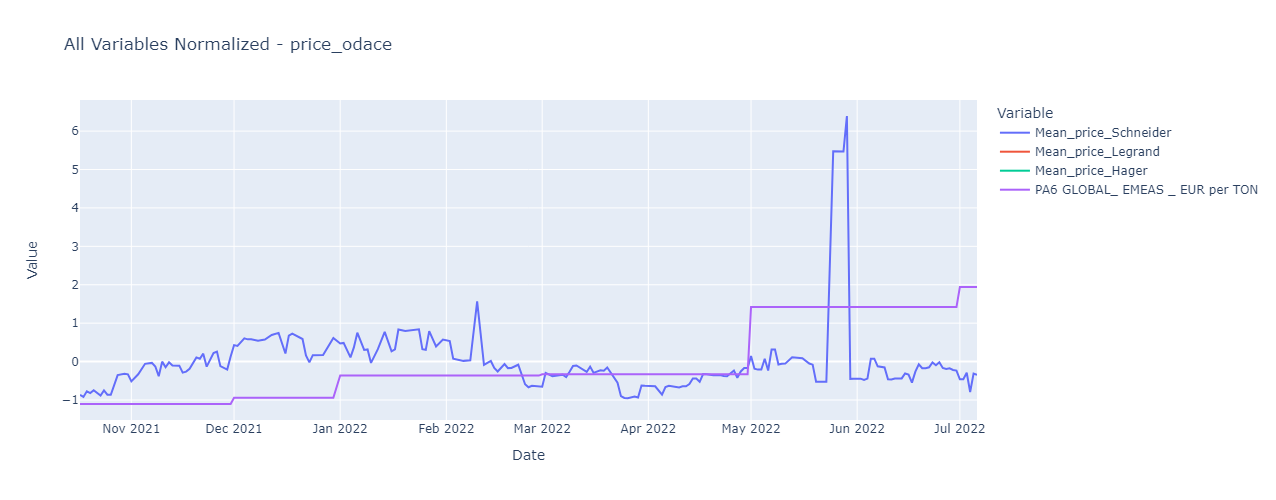

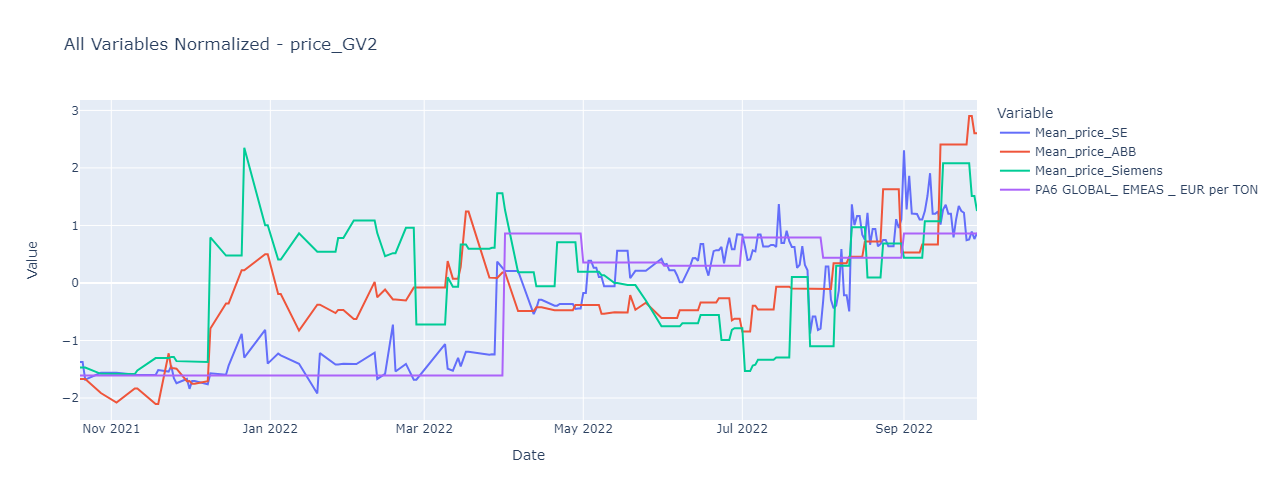

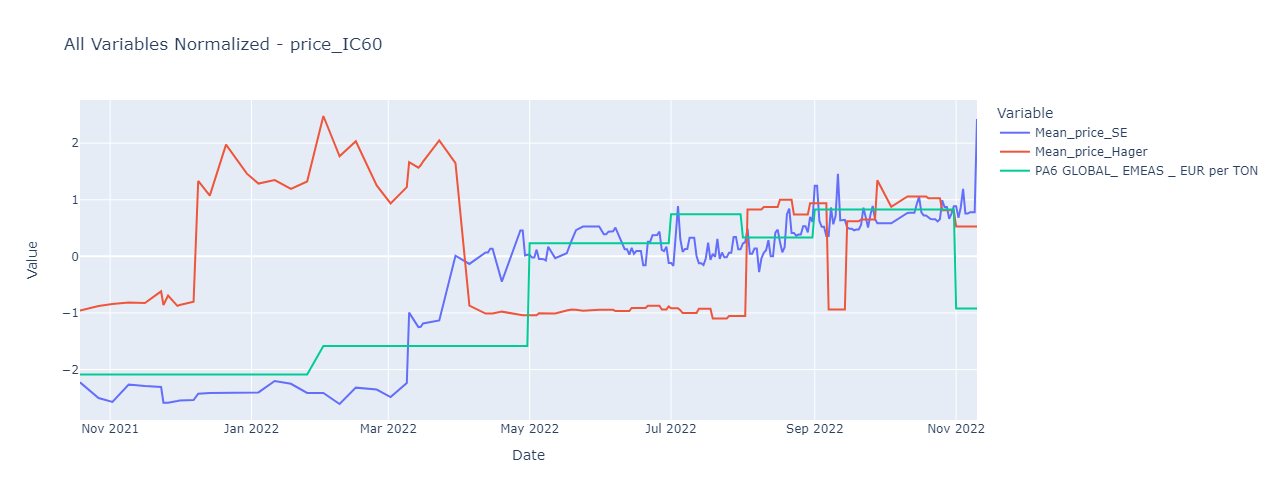

In [67]:
normalize_and_plot(price_odace_PA6, 'All Variables Normalized - price_odace')
normalize_and_plot(price_GV2_PA6, 'All Variables Normalized - price_GV2')
normalize_and_plot(price_IC60_PA6, 'All Variables Normalized - price_IC60')

In [68]:
correlation_odace = price_odace_PA6.corr()['PA6 GLOBAL_ EMEAS _ EUR per TON']
correlation_GV2 = price_GV2_PA6.corr()['PA6 GLOBAL_ EMEAS _ EUR per TON']
correlation_IC60 = price_IC60_PA6.corr()['PA6 GLOBAL_ EMEAS _ EUR per TON']

print("Correlation Coefficients for price_odace_PA6:")
print(price_odace_PA6.corr()['PA6 GLOBAL_ EMEAS _ EUR per TON'])
print()  # Adding a blank line for better readability

# Printing correlation coefficients for price_GV2_PA6
print("Correlation Coefficients for price_GV2_PA6:")
print(price_GV2_PA6.corr()['PA6 GLOBAL_ EMEAS _ EUR per TON'])
print()  # Adding a blank line for better readability

# Printing correlation coefficients for price_IC60_PA6
print("Correlation Coefficients for price_IC60_PA6:")
print(price_IC60_PA6.corr()['PA6 GLOBAL_ EMEAS _ EUR per TON'])

Correlation Coefficients for price_odace_PA6:
Mean_price_Schneider               0.148754
Mean_price_Legrand                      NaN
Mean_price_Hager                        NaN
PA6 GLOBAL_ EMEAS _ EUR per TON    1.000000
Name: PA6 GLOBAL_ EMEAS _ EUR per TON, dtype: float64

Correlation Coefficients for price_GV2_PA6:
Mean_price_SE                      0.841660
Mean_price_ABB                     0.418522
Mean_price_Siemens                 0.060293
PA6 GLOBAL_ EMEAS _ EUR per TON    1.000000
Name: PA6 GLOBAL_ EMEAS _ EUR per TON, dtype: float64

Correlation Coefficients for price_IC60_PA6:
Mean_price_SE                      0.759527
Mean_price_Hager                  -0.120425
PA6 GLOBAL_ EMEAS _ EUR per TON    1.000000
Name: PA6 GLOBAL_ EMEAS _ EUR per TON, dtype: float64
